<a href="https://colab.research.google.com/github/Ngchihieu2003/timeseries/blob/main/TH4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1. Cài đặt và import thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq


2. Tải dữ liệu từ file CSV

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Data.csv to Data.csv


Giả sử file là "Data.csv"

In [3]:
df = pd.read_csv("Data.csv")

3. Chuẩn bị dữ liệu thời gian

In [4]:
interval_minutes = 10
n_points = len(df)
time = pd.date_range(start="2023-01-01", periods=n_points, freq=f"{interval_minutes}T")

df["Timestamp"] = time
df.set_index("Timestamp", inplace=True)

<ipython-input-4-d59bda38d2de>:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time = pd.date_range(start="2023-01-01", periods=n_points, freq=f"{interval_minutes}T")


4. Phân tích phổ tần số (FFT)

In [5]:
temperature = df["Temperature"].values
temp_detrended = temperature - np.mean(temperature)


Biến đổi Fourier

In [6]:
fft_values = fft(temp_detrended)
frequencies = fftfreq(n_points, d=interval_minutes * 60)  # Hz


Lọc tần số dương và chuyển thành chu kỳ (giờ)

In [7]:
positive_freqs = frequencies > 0
period_hours = 1 / (frequencies[positive_freqs] * 3600)


Vẽ phổ tần số

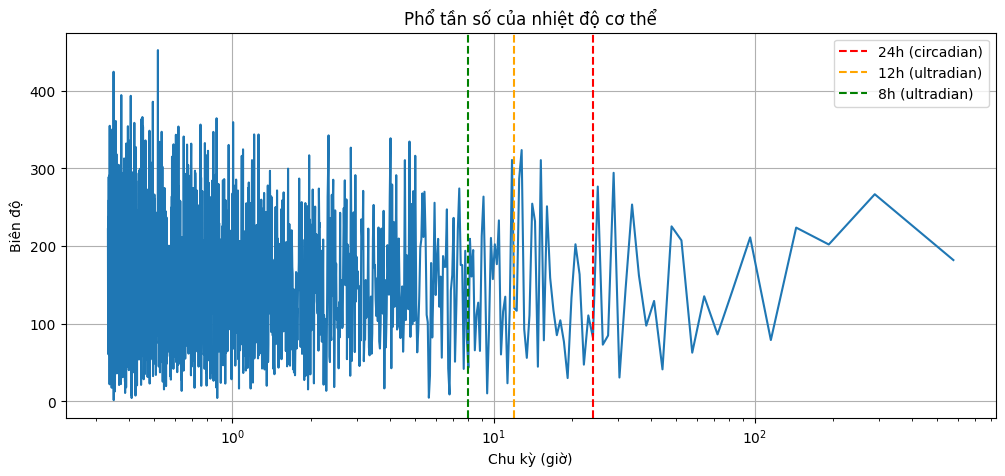

In [8]:
plt.figure(figsize=(12, 5))
plt.plot(period_hours, np.abs(fft_values[positive_freqs]))
plt.xscale('log')
plt.xlabel("Chu kỳ (giờ)")
plt.ylabel("Biên độ")
plt.title("Phổ tần số của nhiệt độ cơ thể")
plt.grid(True)
plt.axvline(24, color='red', linestyle='--', label='24h (circadian)')
plt.axvline(12, color='orange', linestyle='--', label='12h (ultradian)')
plt.axvline(8, color='green', linestyle='--', label='8h (ultradian)')
plt.legend()
plt.show()

5. So sánh nhiệt độ ngày và đêm

In [9]:
df['Hour'] = df.index.hour
df['Day/Night'] = df['Hour'].apply(lambda h: 'Day' if 8 <= h <= 20 else 'Night')

mean_day = df[df['Day/Night'] == 'Day']['Temperature'].mean()
mean_night = df[df['Day/Night'] == 'Night']['Temperature'].mean()

print(f"Nhiệt độ trung bình ban ngày: {mean_day:.2f} °C")
print(f"Nhiệt độ trung bình ban đêm: {mean_night:.2f} °C")

Nhiệt độ trung bình ban ngày: 25.03 °C
Nhiệt độ trung bình ban đêm: 24.94 °C


6. Gợi ý đánh giá rối loạn nhịp sinh học

In [10]:
amplitude_24h = np.abs(fft_values[np.argmax(np.isclose(1/(frequencies*3600), 24))])
amplitude_12h = np.abs(fft_values[np.argmax(np.isclose(1/(frequencies*3600), 12))])

if amplitude_24h < amplitude_12h:
    print("⚠️ Cảnh báo: Dao động ultradian (12h) chiếm ưu thế hơn chu kỳ 24h → có thể có rối loạn nhịp sinh học.")
else:
    print("✅ Nhịp sinh học 24h chiếm ưu thế → không có dấu hiệu rối loạn rõ rệt.")

✅ Nhịp sinh học 24h chiếm ưu thế → không có dấu hiệu rối loạn rõ rệt.


<ipython-input-10-6bbf23b69634>:1: RuntimeWarning: divide by zero encountered in divide
  amplitude_24h = np.abs(fft_values[np.argmax(np.isclose(1/(frequencies*3600), 24))])
<ipython-input-10-6bbf23b69634>:2: RuntimeWarning: divide by zero encountered in divide
  amplitude_12h = np.abs(fft_values[np.argmax(np.isclose(1/(frequencies*3600), 12))])
